# Image Captioning Model with Enhanced Semantic Attention

In [1]:
def download_repositry():
    %cd /kaggle/working
    ! rm -r Image-Captioning2
    ! git clone https://github.com/MahmoudQaid/Image-Captioning2.git
    %cd Image-Captioning2
download_repositry()

/kaggle/working
rm: cannot remove 'Image-Captioning2': No such file or directory
Cloning into 'Image-Captioning2'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 119 (delta 47), reused 95 (delta 27), pack-reused 0
Receiving objects: 100% (119/119), 7.59 MiB | 12.51 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/kaggle/working/Image-Captioning2


### install packages

In [2]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 7.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 52.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 20.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 71.7 MB/s eta 0:00:00:00:01
     ━━━━━━━

# predict

3 Beams:  A large group of people standing in front of podiums.
Nyquest:  A crowd of people standing in front of a red table covered in papers.



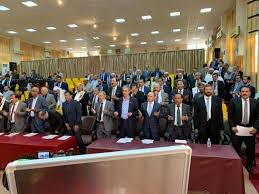

In [3]:
# to predict by our model
from our_predict import predict
from PIL import Image
img_path='test_imgs/1.jpg'


print('3 Beams: ',predict(img_path)+'.')
print('Nyquest: ',predict(img_path,sample=True)+'.')
print()

Image.open(img_path)

# To evaluate the model

In [4]:
from tqdm.notebook import tqdm
import json
config = json.load(open('config.json','r'))
args= json.load(open('args.json','r'))
config,args

args['evaluate']=True
config['load_checkpoint']=True
json.dump(config,open('config.json','w'))
json.dump(args,open('args.json','w'))

In [5]:
!python our_trainer.py

Traceback (most recent call last):
  File "f:\Graduation Project\Codes\Image-Captioning\our_trainer.py", line 15, in <module>
    import ruamel.yaml as yaml
ModuleNotFoundError: No module named 'ruamel'


In [ ]:
from collections import defaultdict
import json,string,re

def prepare_tt_kar_text(json_file_path,pattern=None,lower=False):
    # this function return dictionary 
    with open(json_file_path,'r') as file:
        data=json.loads(file.read())
    dict_data=defaultdict(lambda: defaultdict(list))
    for example in data['images']:
        temp=[]
        for sentence in example['sentences']:
            cap=sentence['raw']
            if lower:
                cap=cap.lower()
                
            cap=cap.translate(str.maketrans('','',string.punctuation))
            
            if pattern is not None:
                cap=re.sub(pattern,'',cap)
            cap=' '.join(cap.split())
            
            dict_data[example['split']][example['filename']].append(cap)
    return dict_data
raw_kar=prepare_tt_kar_text(config['karpathy_annot_path'],pattern=None,lower=False)


from our_predict import happy_tt,args
from data.utils import coco_caption_eval

captioning_results={
    'val':json.load(open('output/Caption_coco/result/val_epoch0.json','r')),
}
preds=[]
annot={'annotations':[],'images':[]}
for i,res in enumerate(tqdm(captioning_results['val'])):
    out_cap=happy_tt.generate_text("grammar: "+res['caption'], args=args).text
    preds.append({'image_id':res['image_id'],'caption':out_cap})
    for cap in raw_kar['val'][res['image_id'].split('/')[-1]]:
        annot['images'].append({'id':res['image_id']})
        annot['annotations'].append({'image_id':res['image_id'],'caption':cap,'id':i})
eval_path='/kaggle/working'
json.dump(annot,open(eval_path+'/coco_karpathy_val_gt.json','w'))
json.dump(preds,open(eval_path+'/coco_karpathy_val_result.json','w'))
coco_val = coco_caption_eval(eval_path,eval_path+'/coco_karpathy_val_result.json','val')

# To train the captioner

In [ ]:
from tqdm.notebook import tqdm
import json
config = json.load(open('config.json','r'))
args= json.load(open('args.json','r'))
args['evaluate']=False
config['load_checkpoint']=False
config['max_epoch']=5
# config['karpathy_annot_path']= '/kaggle/input/karpathy-splits/dataset_flickr8k.json'
# config['image_root']= '/kaggle/input/flickr8k/Images/'
json.dump(config,open('config.json','w'))
json.dump(args,open('args.json','w'))
config,args


In [ ]:
!python our_trainer.py

In [ ]:
assert(False)

# Training Corrector 

In [ ]:
from prepare_data import pattern
from data.utils import load_doc_karpathy
import csv
import pandas as pd


def generate_csv(csv_path, splits=['train']):
    # input_dict: {'img_name':['one caption']}
    # refs_dict: {'img_name':['caption1','cap2','cap3']}
    with open(csv_path, 'w', newline='') as csvfile:
        writter = csv.writer(csvfile)
        writter.writerow(["input", "target"])
        for sp in splits:
            for inp,tar in zip(kar_with_pattern[sp],raw_kar[sp]):
                if sp in {'test','val'}:
                    for i in range(len(inp['caption'])):
                            writter.writerow(['grammar: '+inp['caption'][i], tar['caption'][i]+'.'])
                else:
                    writter.writerow(['grammar: '+inp['caption'], tar['caption']+'.'])


kar_with_pattern=load_doc_karpathy('/kaggle/input/karpathy-splits/dataset_coco.json',pattern=pattern,lower=True)
raw_kar=load_doc_karpathy('/kaggle/input/karpathy-splits/dataset_coco.json',pattern=None,lower=False)


In [ ]:

generate_csv('file.csv',['val'])

data=pd.read_csv('file.csv')
data=data.sample(frac=1)
train_df=data[:int(len(data)*0.9)]
val_df=data[int(len(data)*0.9):]

# int(len(data)*0.8)
train_df.to_csv('train.csv',index=False)
val_df.to_csv('val.csv',index=False)

In [ ]:

from happytransformer import HappyTextToText, TTTrainArgs
EPOCHS=2
BATCH_SIZE=50
CHECKPOINT_PATH='corrector/'
corrector = HappyTextToText("T5", "t5-base")
args = TTTrainArgs(batch_size=BATCH_SIZE,num_train_epochs=EPOCHS)

corrector.train('train.csv', args=args)
print(corrector.eval('val.csv'))

corrector.save(CHECKPOINT_PATH)

# # Add the prefix "grammar: " before each input 
# result = happy_tt.generate_text("grammar: This sentences has has bads grammar.", args=args)
# print(result.text) # This sentence has bad grammar.

In [ ]:
assert(False)